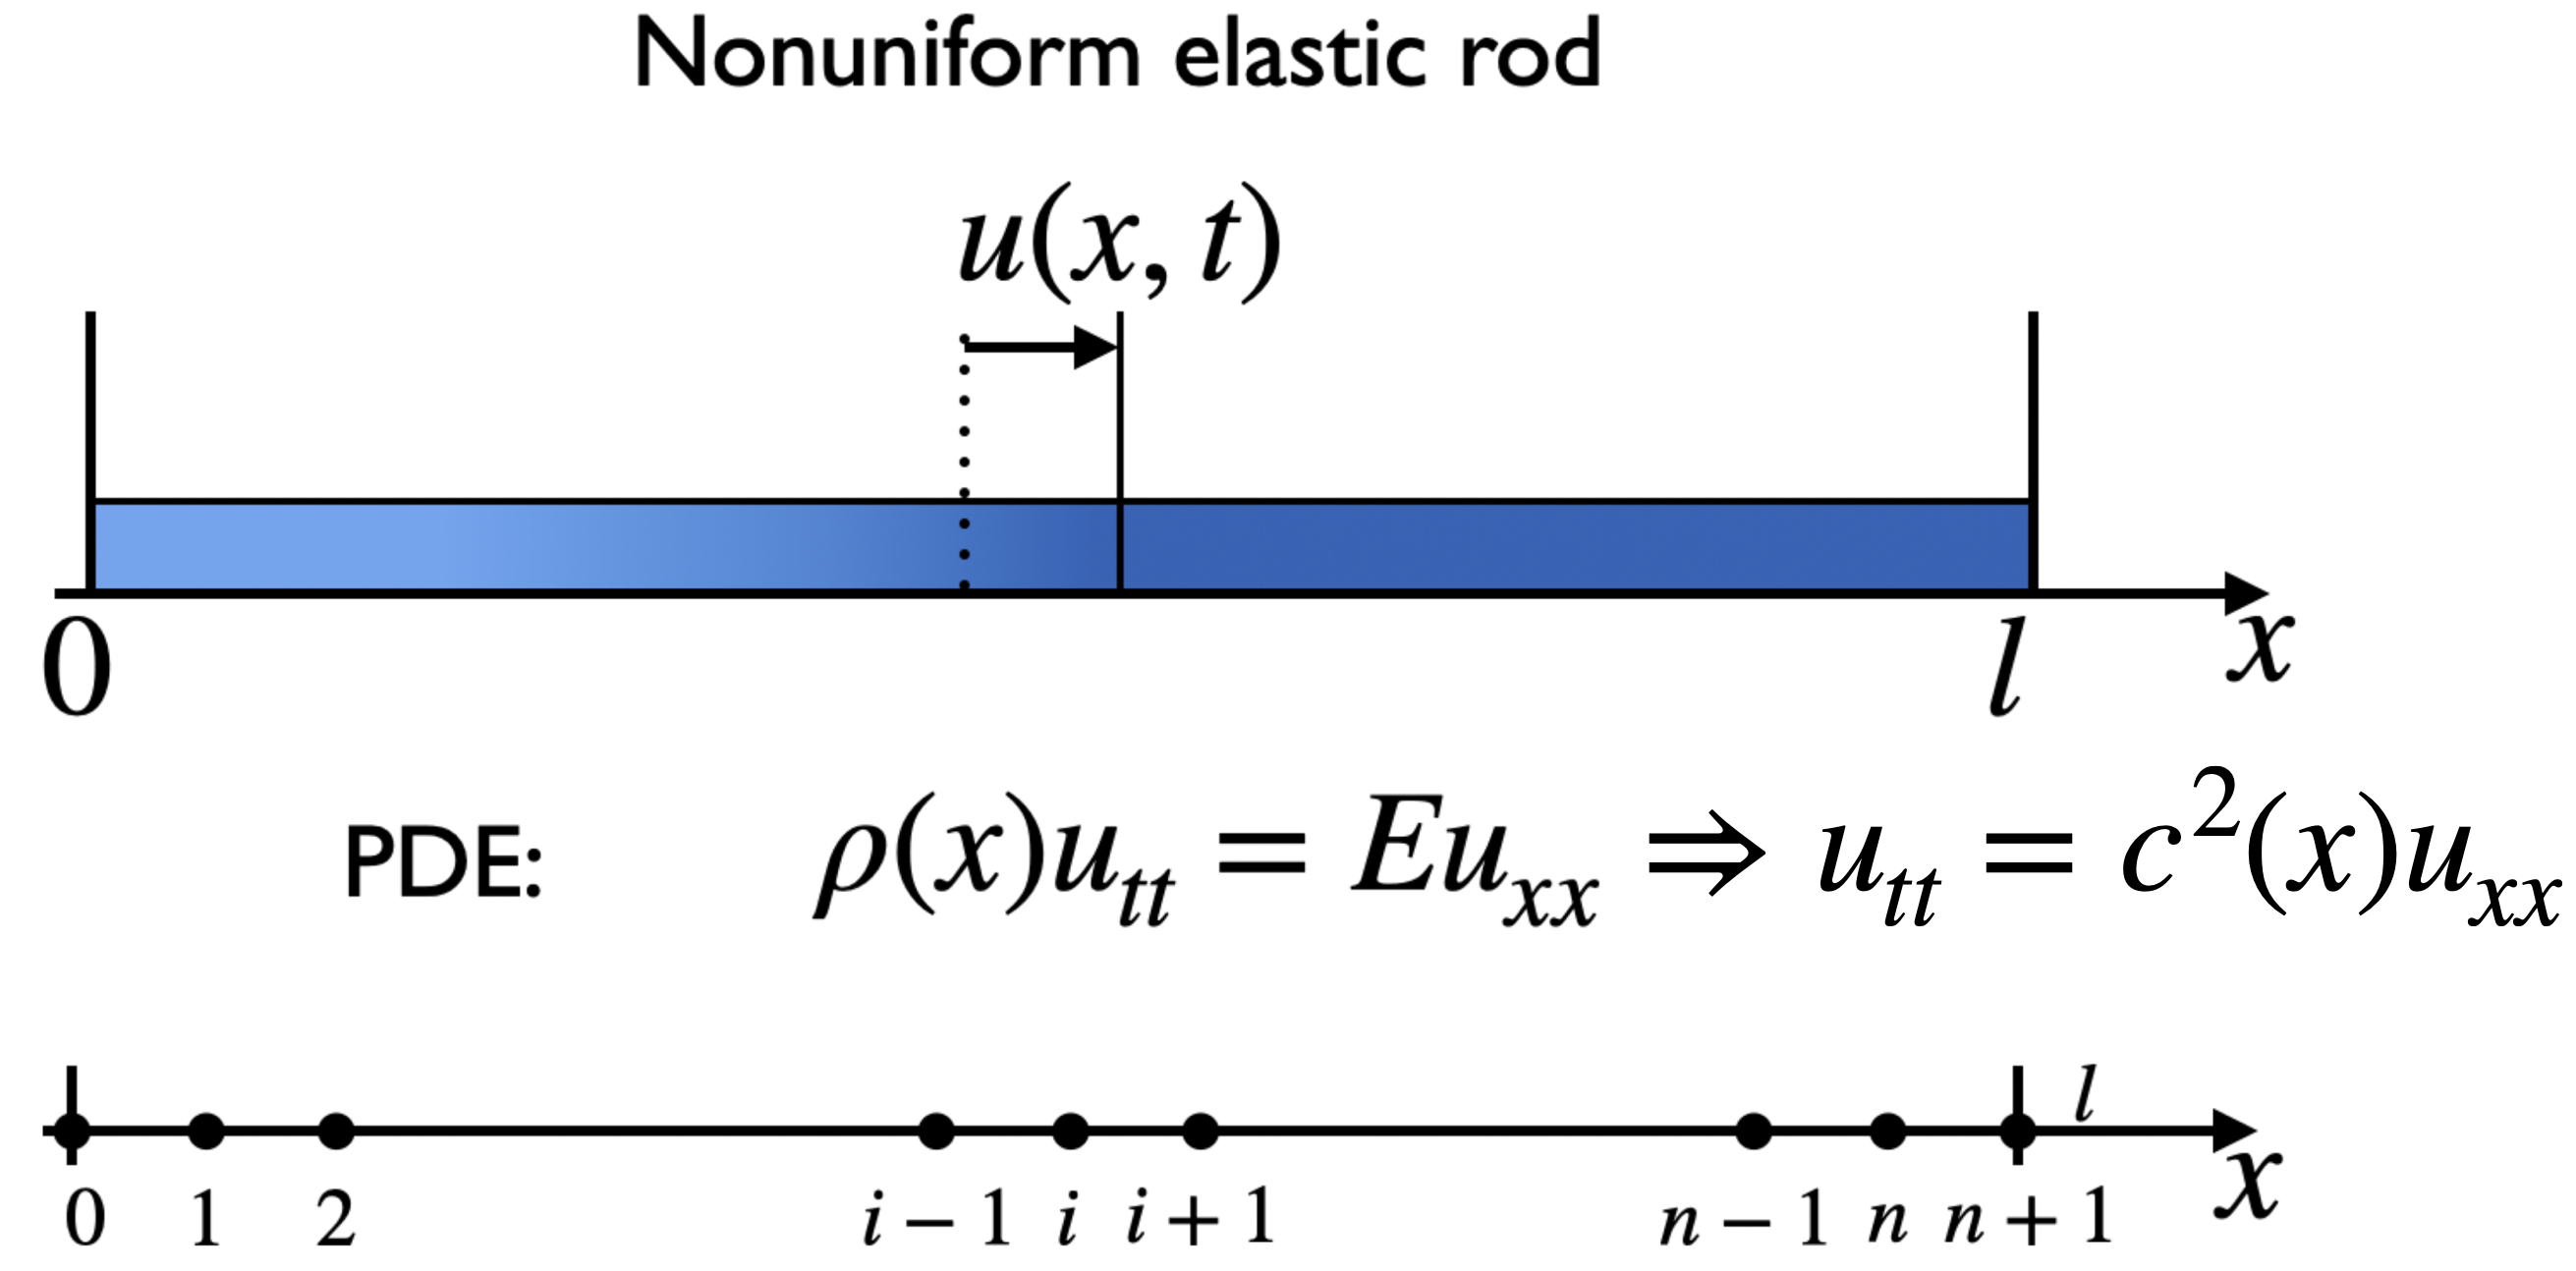

# We want to solve the following boundary value problem:
#$$
\phi'' + \lambda^2\left(1-\epsilon x(1-x)\right)\phi=0\\
\textrm{BC: } \phi(0) = \phi(1) = 0
$$
# NOTE: We know that $\lambda_n=\pi n$ and $\phi_n(x)=\sin(\pi n x)$, $n\in \mathbb{N}$ when $\epsilon = 0$


# a) Find the eigenvalues $\lambda^2$ numerically using the second derivative approximation $\phi''\approx (\phi_{i-1}−2\phi_i+\phi_{i+1})/h^2$, with the grid points $x=x_i=ih,i= 0,1,2,...,n+1 $and the grid size $h=l/(n+ 1)$. Take $n$ sufficiently large so that the computed eigenvalues and eigenvectors are accurate. How do you choose that number?

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# Discretization
# Define computational domain ... and grid x_0, ..., x_{n+1} with the step h

L = 1.                   # the x-domain is [0,1] 
n = 999                  # the number of grid points on the domain
x = np.linspace(0,L,n+2) # the grid
h = x[1]-x[0]            # step size in x to approximate derivatives u'' = (u(i+1)-2*u(i)+u(i-1))/h^2
x

array([0.   , 0.001, 0.002, ..., 0.998, 0.999, 1.   ])

# Our discretisation gives
\begin{align}
&\text{UNIFORM GRID } \{x_i\}_{i=0}^{n+1} : & x_0=0, \ x_1=h, \dots,\ x_i=ih,\ \dots , \ x_n=1-h, \ x_{n+1}=1
\\
&\text{GRID FUNCTION } \{\phi(x_i)\}_{i=0}^{n+1} : & \phi(x_0)=0, \ \phi(x_1), \  \dots,\ \phi(x_i),\ \dots , \ \phi(x_n), \ \phi(x_{n+1})=0
\end{align}
# What is unknown?
$$
\phi(x_1), \dots,\ \phi(x_i),\ \dots , \ \phi(x_n)
$$
# How to find? Use equation on the grid! NOTE: ODE becomes a system of linear equations.
$$
\phi''\left(x_i\right) + \lambda^2\left(1-\epsilon x_i(1-x_i)\right)\phi\left(x_i\right)=0,\ i=1,\dots,n\\
\textrm{BC: } \phi(0) = \phi_0 = 0, \ \phi(1) = \phi_{n+1}= 0
$$
# Use approximation of $\phi''$ ...

$$
\phi_{i-1}-2\phi_{i}+\phi_{i+1} + h^2\lambda^2\left(1-\epsilon x_i(1-x_i)\right)\phi\left(x_i\right)=0,\ i=1,\dots,n\\
$$

$$
-\phi_{i-1}+2\phi_{i}-\phi_{i+1} = h^2\lambda^2\left(1-\epsilon x_i(1-x_i)\right)\phi\left(x_i\right),\ i=1,\dots,n\\
$$

\begin{cases}
2\phi_{1}-\phi_{2} &=& h^2\lambda^2\left(1-\epsilon x_1(1-x_1)\right)\phi\left(x_1\right) + \phi_{0},\ i=1 \\
-\phi_{i-1}+2\phi_{i}-\phi_{i+1} &=& h^2\lambda^2\left(1-\epsilon x_i(1-x_i)\right)\phi\left(x_i\right),\ i=2,\dots,n-1 \\
-\phi_{n-1}+2\phi_{n} &=& h^2\lambda^2\left(1-\epsilon x_n(1-x_n)\right)\phi\left(x_n\right) + \phi_{n+1},\ i=n\\
\end{cases}

#Finally, the matrix form with $g(x) = 1-\epsilon x(1-x)$. NOTE: HOMOGENEOUS BCs $\phi_0 = \phi_{n+1}=0$ !!! 

$$ A\phi=
\begin{pmatrix}
2 & -1 & 0  & 0 & 0 & \dots & 0\\
-1 & 2 & -1 & 0 & 0 & \dots & 0\\
0 & -1 & 2  & -1 & 0 &\dots & 0\\
\vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \vdots\\
0 & \dots &0& -1  & 2 & -1 & 0 \\
0 & \dots &0& 0  & -1 & 2 & -1 \\
0 & \dots &0& 0  & 0 & -1 & 2\\
\end{pmatrix}
\begin{pmatrix}
\phi_1\\
\phi_2\\
\vdots\\
\phi_i\\
\vdots\\
\phi_{n-1}\\
\phi_n
\end{pmatrix} = \lambda^2 \begin{pmatrix}
h^2g(x_1) & 0 & 0  & 0 & 0 & \dots & 0\\
0 & h^2g(x_2) & 0 & 0 & 0 & \dots & 0\\
0 & 0 & h^2g(x_3)  & 0 & 0 &\dots & 0\\
\vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \vdots\\
0 & \dots &0& 0  & h^2g(x_{n-2}) & 0 & 0 \\
0 & \dots &0& 0  & 0 & h^2g(x_{n-1}) & 0 \\
0 & \dots &0& 0  & 0 & 0 & h^2g(x_n)\\
\end{pmatrix}
\begin{pmatrix}
\phi_1\\
\phi_2\\
\vdots\\
\phi_i\\
\vdots\\
\phi_{n-1}\\
\phi_n
\end{pmatrix} = \lambda^2 K \phi
$$

$$
A\phi = \lambda^2 K \phi \Rightarrow K^{-1} A \phi =\lambda^2 \phi -\phi - K^{-1}A\phi =-\lambda^2 \phi 
$$

In [20]:
x = x[1:-1]
def solve_for_eps(eps):
    # Write the system for eigenvalue problem
    A = 2*np.eye(n) - np.eye(n,k=1) - np.eye(n,k=-1) # second-derivative matrix
    K_inv = np.diag(1./h**2/(1. - eps*x*(1.-x)))     # inverse of the RHS matrix
    # Solve the eigenvalue problem and sort e-values and e-vectors in ascending order
    lambda_2, e_vecs = np.linalg.eig(K_inv @ A) # or np.dot(K_inv, A)
    order = np.argsort(lambda_2)
    return lambda_2[order], e_vecs[:,order]

What about the choice of $n$? You could use different approaches, but maybe the simplest one is the following. We know that the approximation $\phi''\approx (\phi_{i-1}−2\phi_i+\phi_{i+1})/h^2$ has error of order $Ch^2$. For our case, when we assume the eigenfunctions $\phi_n(x)$ to be close to $\sin(x)$, $C\sim \max\{\phi^{IV}(x)\} \sim 1$. Then, choosing some tolerance for this approximation error, e.g. $10^{-6}$:
$$
h^2 \sim \frac{1}{n^2} = 10^{-6} \Rightarrow n \sim 1000. 
$$

#b) Plot the eigenvectors that correspond to the lowest five eigenvalues at $\epsilon = 0.1$ and on a separate plot show the first ten numerically found eigenvalues $\lambda$. How do they compare with those at $\epsilon = 0$?

In [21]:
# Solve for eps = 0.1
lambda_2_eps01, e_vecs_eps01 = solve_for_eps(0.1)

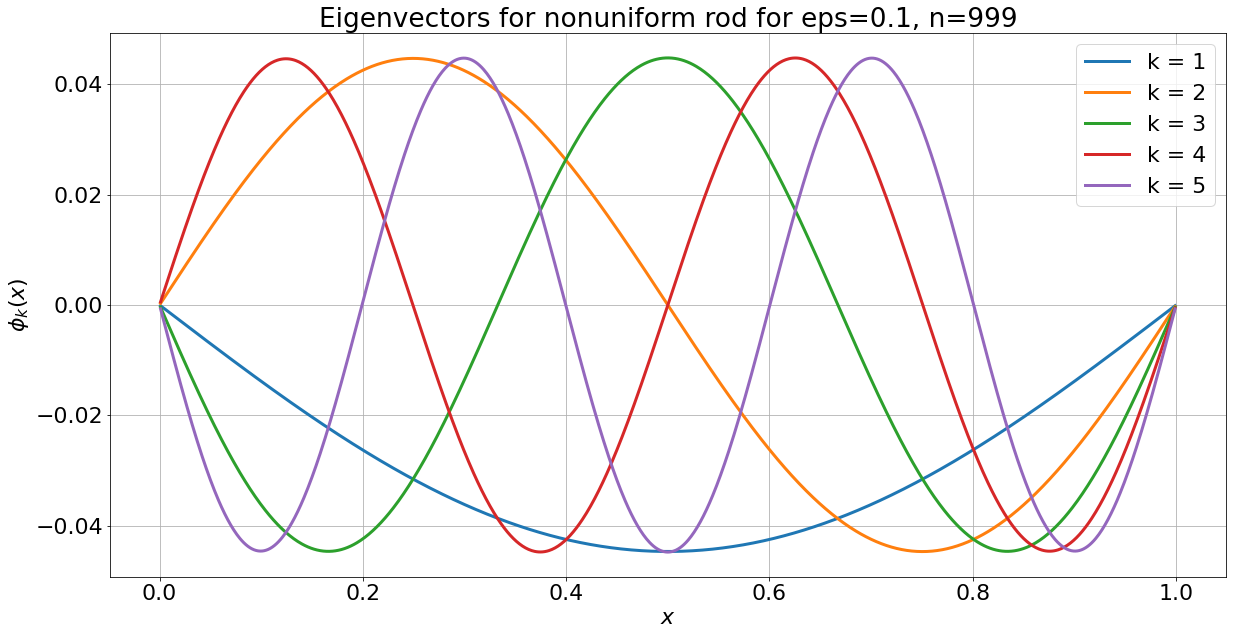

In [22]:
# Choose which eigenvectors to plot
plt.rcParams.update({'font.size': 22, 'lines.markersize':15, 'lines.linewidth':3, 'axes.grid':True})
nn = [0,1,2,3,4] 
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(x,e_vecs_eps01[:,nn],'-')
ax.legend(list(map(lambda x: f'k = {x+1}', nn)))
ax.set_xlabel('$x$')
ax.set_ylabel('$\phi_k(x)$')
ax.set_title(f'Eigenvectors for nonuniform rod for eps=0.1, n={n}');

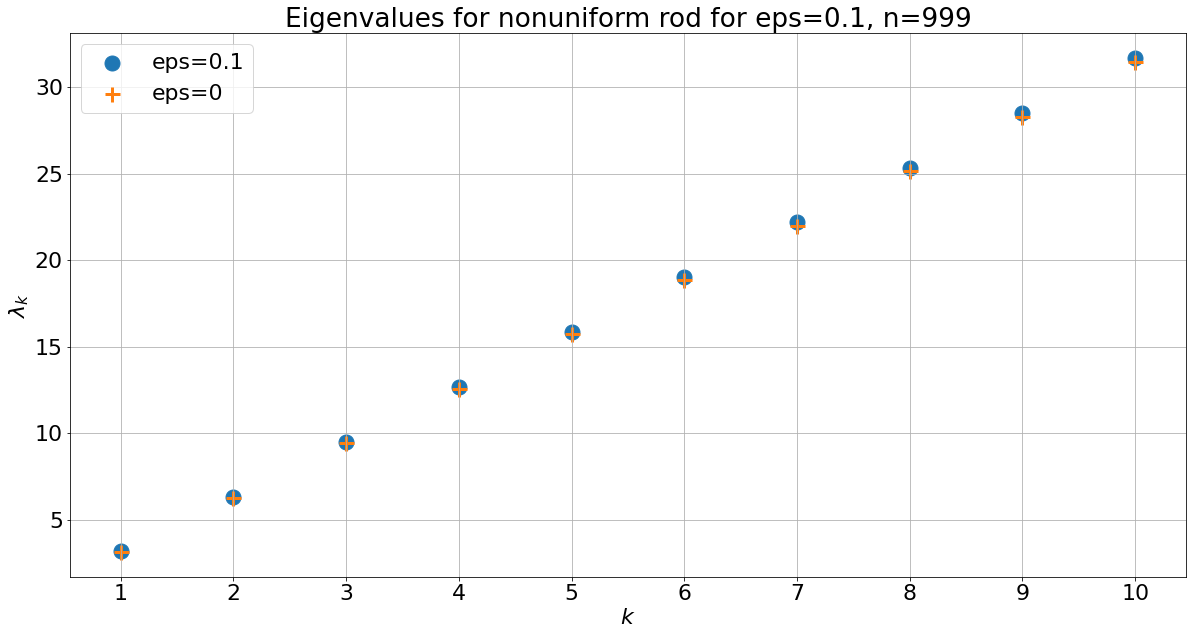

In [23]:
# Choose which eigenvalues to plot
e_end = 10
nn = np.arange(1,e_end+1) 
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(nn,np.sqrt(lambda_2_eps01[nn-1]))
ax.scatter(nn,np.pi*nn,marker='+')
ax.legend(['eps=0.1','eps=0'])
ax.set_xticks(np.arange(1,e_end+1))
ax.set_title(f'Eigenvalues for nonuniform rod for eps=0.1, n={n}');
ax.set_xlabel('$k$');
ax.set_ylabel('$\lambda_k$');

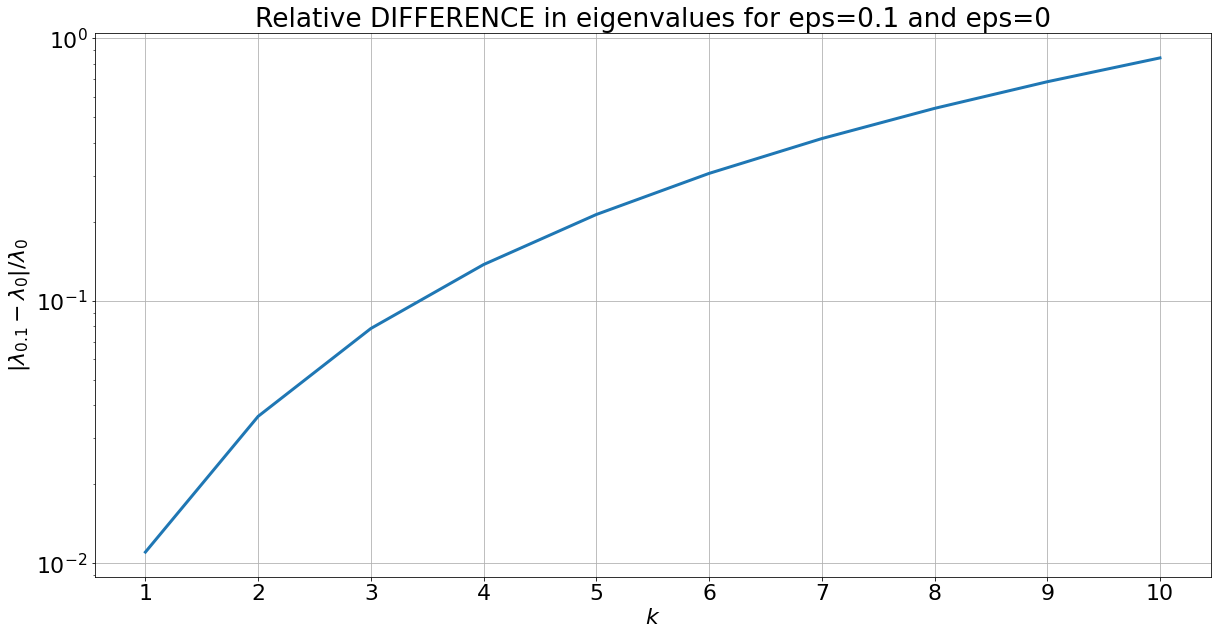

In [24]:
# Plot the DIFFERENCE between eigenvalues for eps=0 and eps=0.1
diff = np.abs(np.sqrt(lambda_2_eps01[:e_end])-np.pi*nn)/np.pi*nn

fig, ax = plt.subplots(figsize=(20,10))
ax.semilogy(nn,diff)
# ax.plot(nn,diff)
ax.set_title('Relative DIFFERENCE in eigenvalues for eps=0.1 and eps=0')
ax.set_xticks(np.arange(1,e_end+1))
ax.set_xlabel('$k$');
ax.set_ylabel('$|\lambda_{0.1}-\lambda_0|/\lambda_0$');

#c) How do eigenvalues and eigenfunctions change when $\epsilon$ increases? Plot $\lambda(\epsilon)$ for the first five eigenvalues.

In [37]:
# Choose a range of eps
# eps_list = np.linspace(0,3.99) # gives 50 uniformly distributed eps between 0 and 3.99
eps_list = np.append(np.arange(0,4.,0.5),3.99) 
eps_list

array([0.  , 0.5 , 1.  , 1.5 , 2.  , 2.5 , 3.  , 3.5 , 3.99])

In [42]:
def solve_for_list(eps_list):
    eval_arr, evecs_arr = [], []
    for eps in eps_list:
        evals, evecs = solve_for_eps(eps)
        eval_arr.append(np.sqrt(evals[:5]))
        evecs_arr.append(evecs[:,:5])
        for i in range(5):
            if evecs_arr[-1][1,i]<0:
                evecs_arr[-1][:,i] = -evecs_arr[-1][:,i]
    return np.array(eval_arr), np.array(evecs_arr)
eval_arr04, evecs_arr04 = solve_for_list(eps_list)

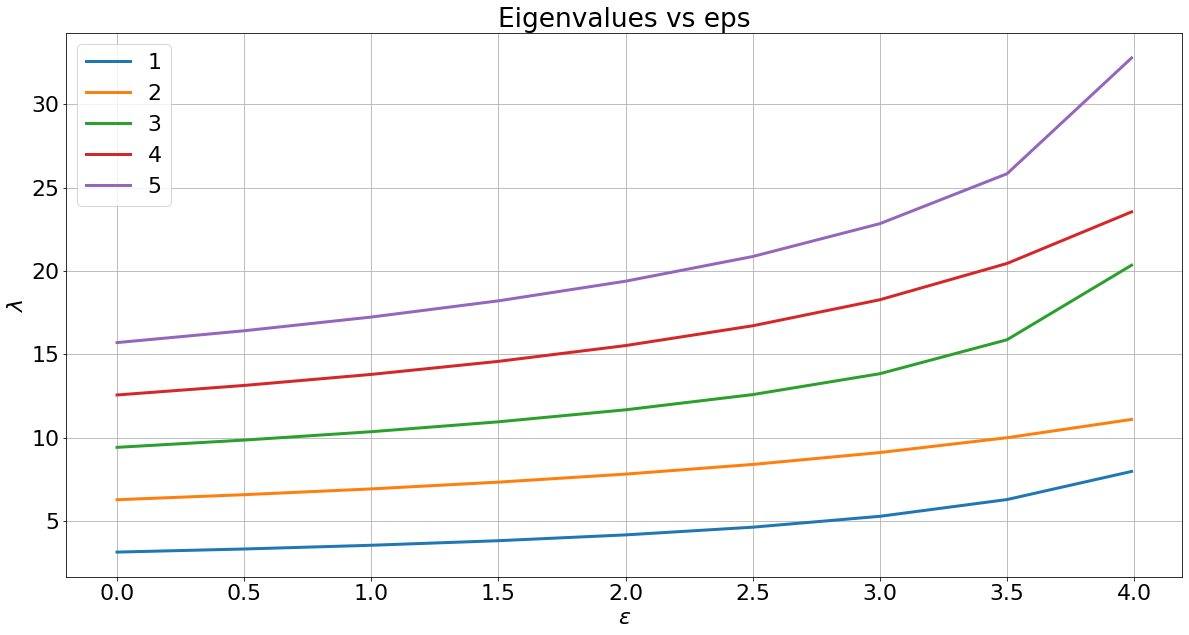

In [43]:
fig,ax = plt.subplots(figsize=(20,10))
for i in range(5):
    ax.plot(eps_list, eval_arr04[:,i])
ax.legend(list(map(lambda x: f'{x+1}', range(5))), loc = 'upper left')
ax.set_xlabel('$\epsilon$')
ax.set_ylabel('$\lambda$')
ax.set_title(f'Eigenvalues vs eps');

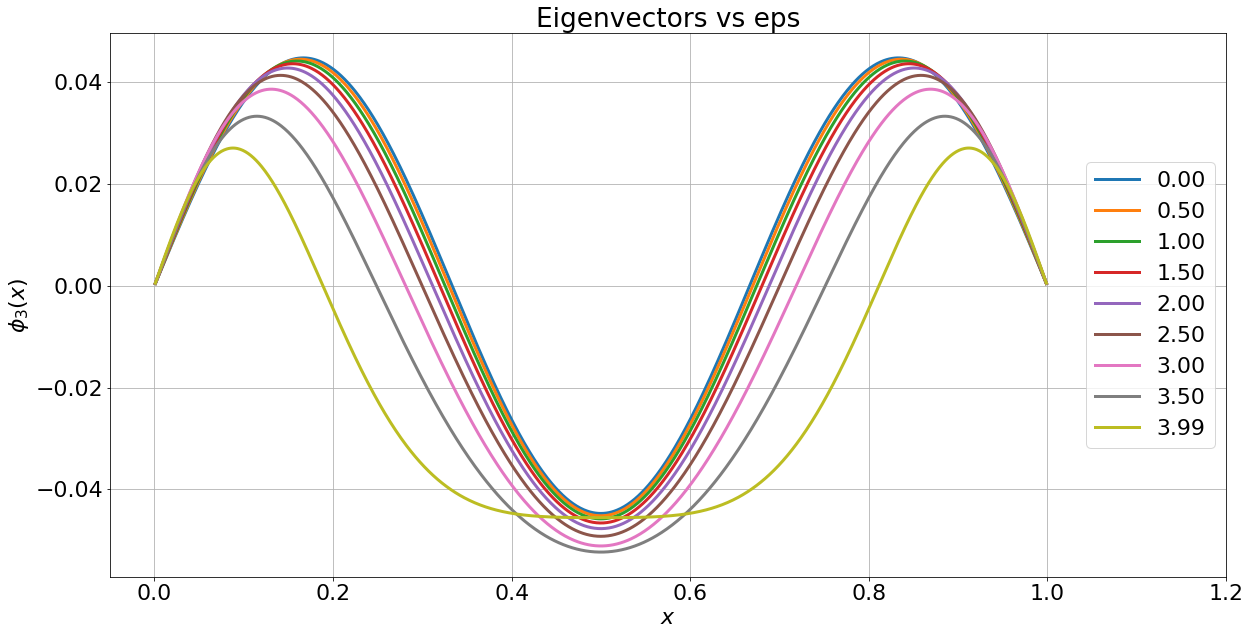

In [45]:
fig,ax = plt.subplots(figsize=(20,10))
n_vec = 3
for k in range(len(eps_list)):
    ax.plot(x, evecs_arr04[k,:,n_vec-1])
ax.legend(list(map(lambda x: f'{x:.2f}', eps_list)),loc='center right')
ax.set_title(f'Eigenvectors vs eps')
ax.set_xlabel('$x$')
ax.set_ylabel(f'$\phi_{n_vec}(x)$')
ax.set_xlim(-0.05,1.2);

# (d) What happens when $\epsilon$ becomes close to $4$?

#$$
\phi'' + \lambda^2\left(1 - 4x(1-x)\right)\phi=0\\
\textrm{BC: } \phi(0) = \phi(1) = 0
$$
Singular Sturm-Liouville problem (e.g. Bessel or Legendre equations, see Zettl, A. Sturm-Liouville Theory. American Mathematical Society, 2005.)
$$
-4\phi'' = \lambda^2y^2\phi \\
\textrm{BC: } \phi(-1) = \phi(1) = 0
$$
Density of the rod is non-physial at the middle 
$$
\rho=\rho_0\left(1−4\frac{x(l−x)}{l^2}\right), \ \rho(l/2) = 0
$$


In [47]:
# Solve for eps close to 4. 
# lambda_2_eps4, e_vecs_eps4 = solve_for_eps(4.0)
lambda_2_eps4, e_vecs_eps4 = solve_for_eps(3.9999)

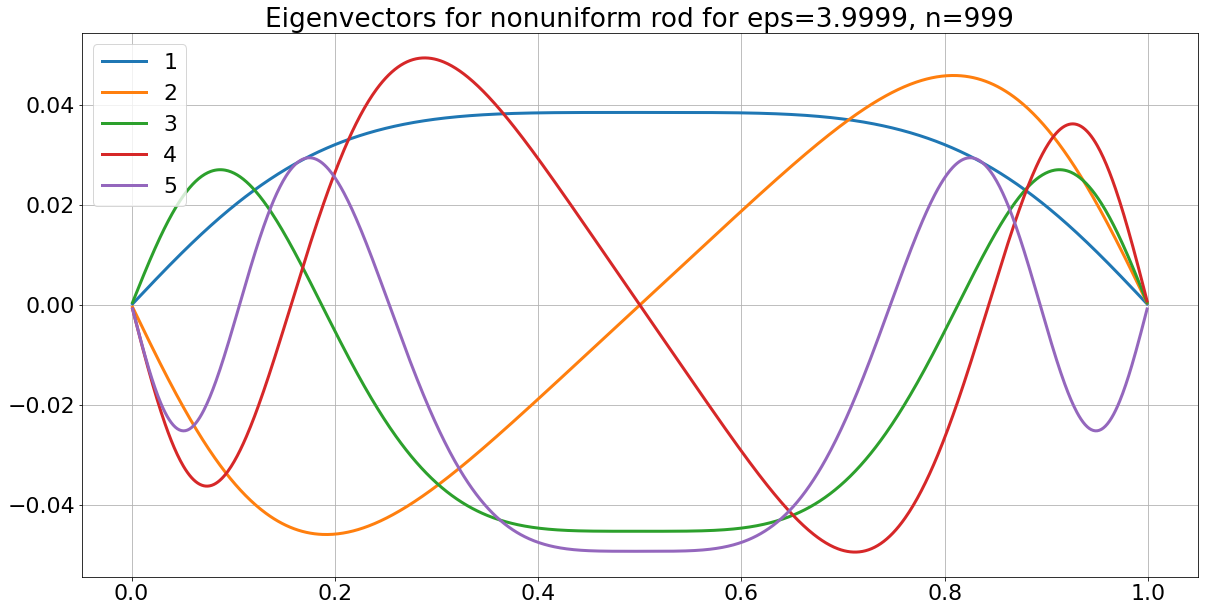

In [48]:
# Choose which eigenvectors to plot
nn = [0,1,2,3,4] 
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(x,e_vecs_eps4[:,nn],'-')
ax.legend(list(map(lambda x: f'{x+1}', nn)), loc='upper left')
ax.set_title(f'Eigenvectors for nonuniform rod for eps=3.9999, n={n}');

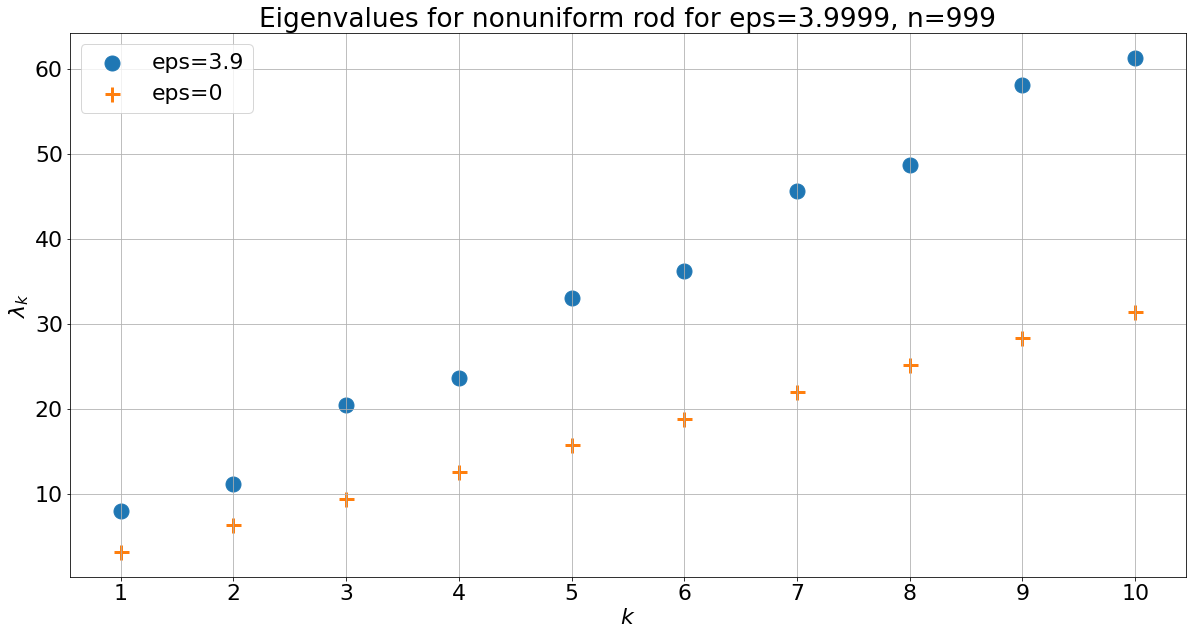

In [49]:
# Choose which eigenvalues to plot
e_end = 10
nn = np.arange(1,e_end+1) 
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(nn,np.sqrt(lambda_2_eps4[nn-1]))
ax.scatter(nn,np.pi*nn,marker='+')
ax.legend(['eps=3.9','eps=0'])
ax.set_xticks(np.arange(1,e_end+1))
ax.set_title(f'Eigenvalues for nonuniform rod for eps=3.9999, n={n}');
ax.set_xlabel('$k$');
ax.set_ylabel('$\lambda_k$');

In [50]:
# Choose a range of eps
eps_list = np.append(np.arange(3.5,4.,0.1),3.99) 
eps_list

array([3.5 , 3.6 , 3.7 , 3.8 , 3.9 , 3.99])

In [51]:
eval_arr354, evecs_arr354 = solve_for_list(eps_list)

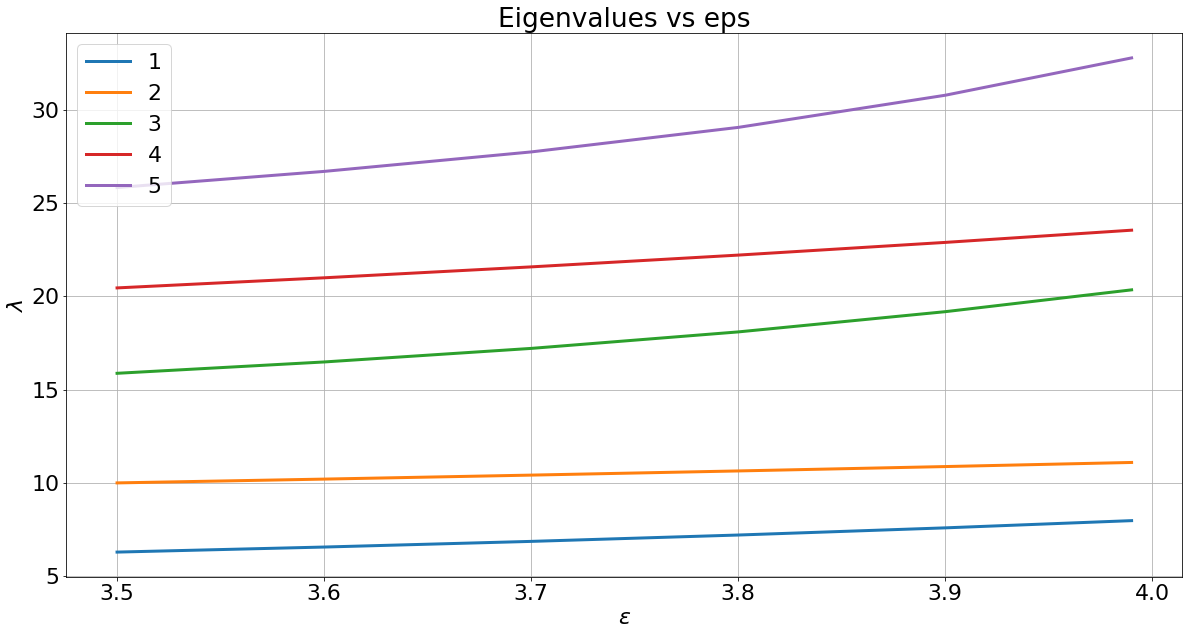

In [52]:
fig,ax = plt.subplots(figsize=(20,10))
for i in range(5):
    ax.plot(eps_list, eval_arr354[:,i])
ax.legend(list(map(lambda x: f'{x+1}', range(5))), loc = 'upper left')
ax.set_xlabel('$\epsilon$')
ax.set_ylabel('$\lambda$')
ax.set_title(f'Eigenvalues vs eps');

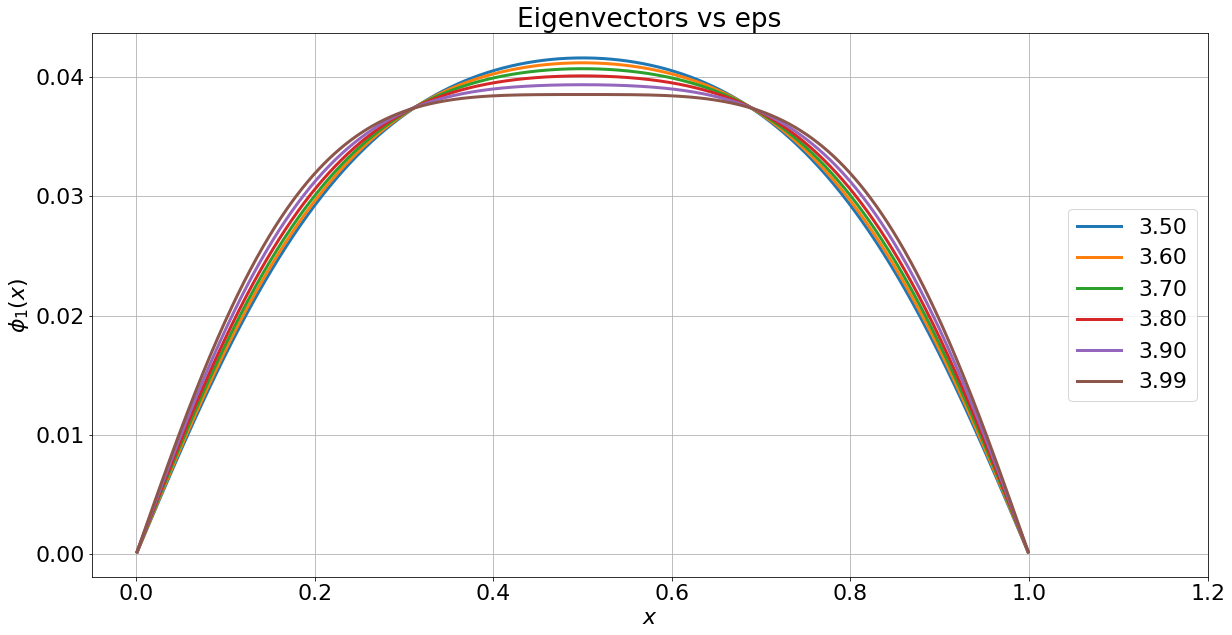

In [53]:
fig,ax = plt.subplots(figsize=(20,10))
n_vec = 1
for k in range(len(eps_list)):
    ax.plot(x, evecs_arr354[k,:,n_vec-1])
ax.legend(list(map(lambda x: f'{x:.2f}', eps_list)),loc='center right')
ax.set_title(f'Eigenvectors vs eps')
ax.set_xlabel('$x$')
ax.set_ylabel(f'$\phi_{n_vec}(x)$')
ax.set_xlim(-0.05,1.2);